In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# load dataset
X, y = load_iris(return_X_y=True)

# first 2 features
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
X_train[1]

array([7.7, 3. ])

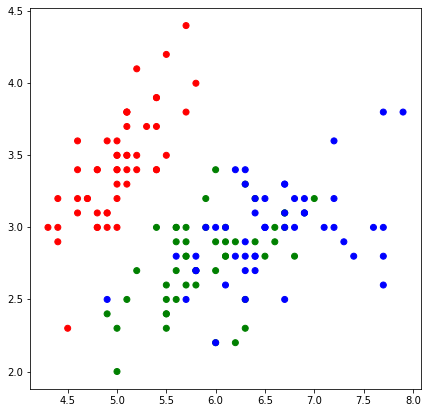

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [6]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [7]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

## Урок 7. Классификация с помощью KNN. Кластеризация K-means
1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.
3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 
4 (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

### 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

position_weights_const

In [9]:
def knn(x_train, y_train, x_test, k, position_weights_const = '1', distance_weights_const = []):
    if position_weights_const == '1':
        position_weights = np.ones(x_train.shape[0])
    elif position_weights_const == '1/i':
        position_weights = np.array([1/(i+1) for i in range(x_train.shape[0])])
        
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i]) * position_weights[i]
            if isinstance(distance_weights_const, (int, float)):
                if distance_weights_const > 0:
                    distance = distance * distance_weights_const**distance
            elif len(distance_weights_const) == 2:
                distance = distance * (distance + distance_weights_const[0])**distance_weights_const[1]
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Точность алгоритма при k = 1: 0.667


<ipython-input-7-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


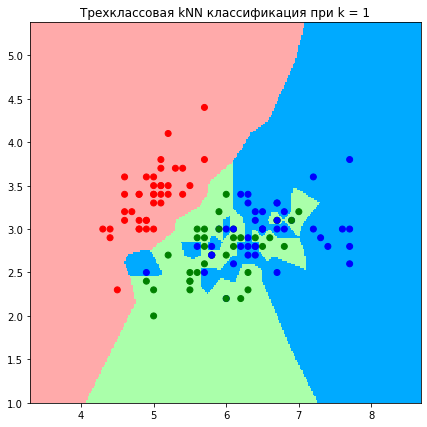

Точность алгоритма при k = 3: 0.733


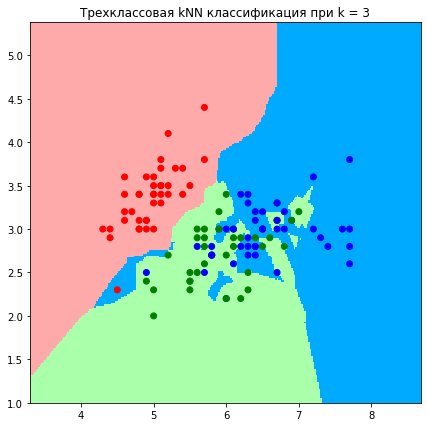

Точность алгоритма при k = 5: 0.867


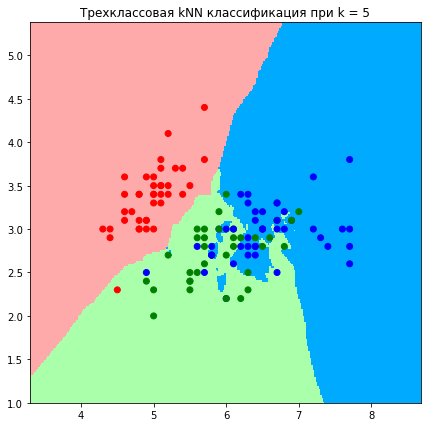

Точность алгоритма при k = 7: 0.800


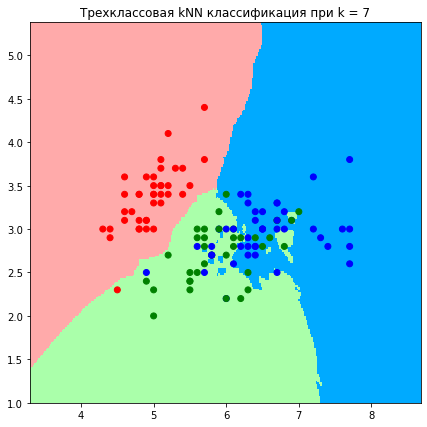

Точность алгоритма при k = 9: 0.867


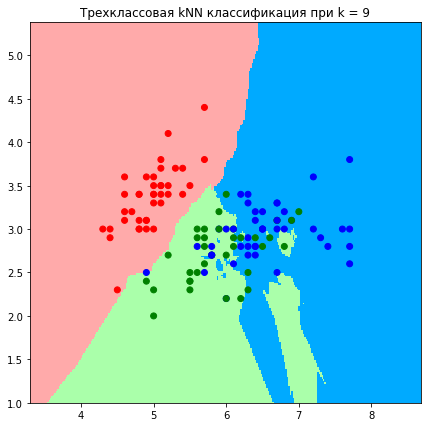

Точность алгоритма при k = 11: 0.833


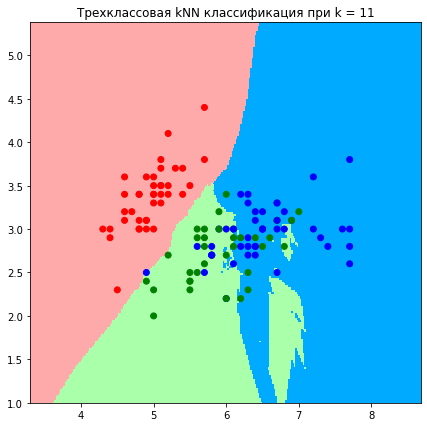

Точность алгоритма при k = 13: 0.833


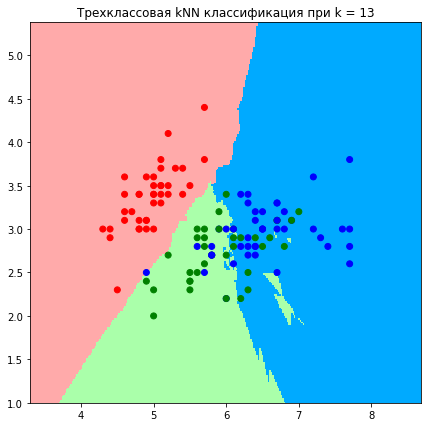

Точность алгоритма при k = 15: 0.833


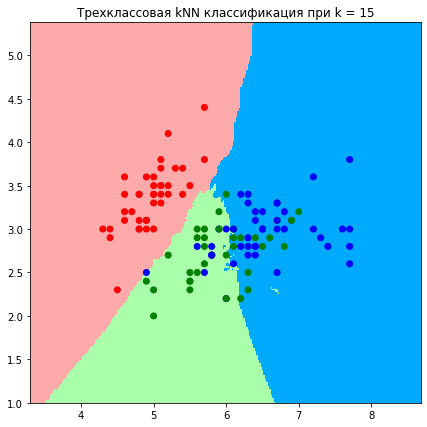

Точность алгоритма при k = 17: 0.833


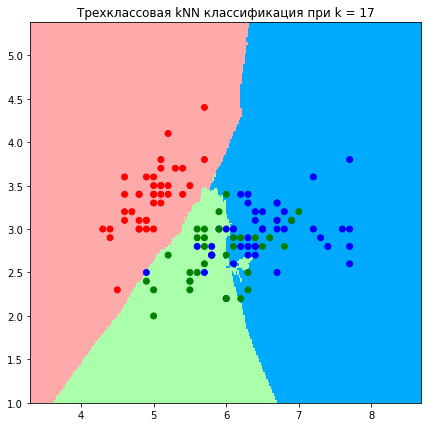

Точность алгоритма при k = 19: 0.833


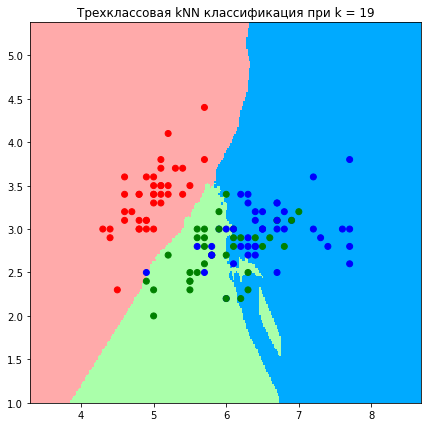

In [10]:
# without any weights
accuracy_array = np.array([])
for k in range(1,21,2):
    y_pred = knn(X_train, y_train, X_test, k)
    temp = accuracy(y_pred, y_test)
    accuracy_array = np.append(accuracy_array, temp)
    print(f'Точность алгоритма при k = {k}: {temp:.3f}')
    get_graph(X_train, y_train, k)

Точность алгоритма при k = 1: 0.733


<ipython-input-7-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


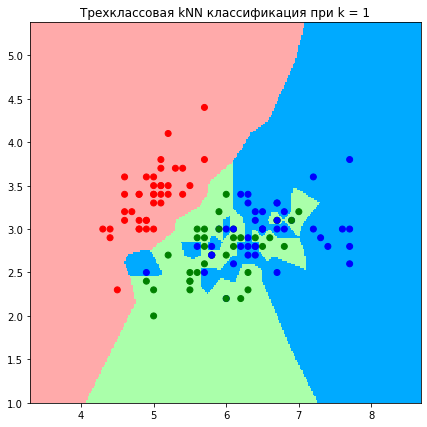

Точность алгоритма при k = 3: 0.667


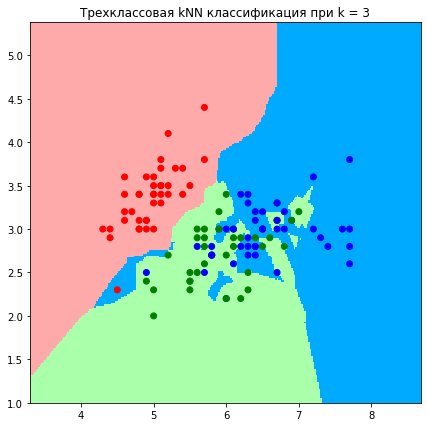

Точность алгоритма при k = 5: 0.667


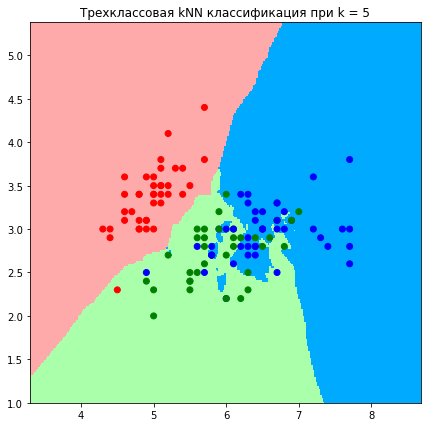

Точность алгоритма при k = 7: 0.767


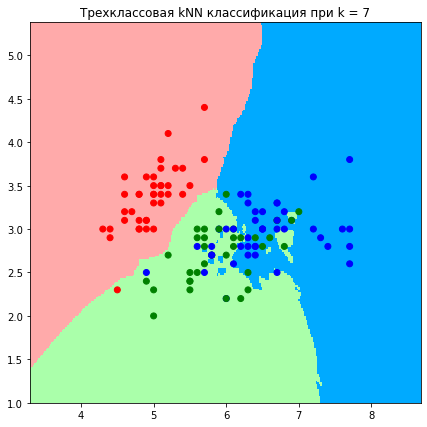

Точность алгоритма при k = 9: 0.800


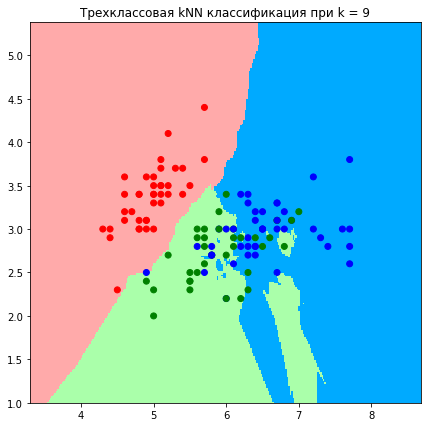

Точность алгоритма при k = 11: 0.800


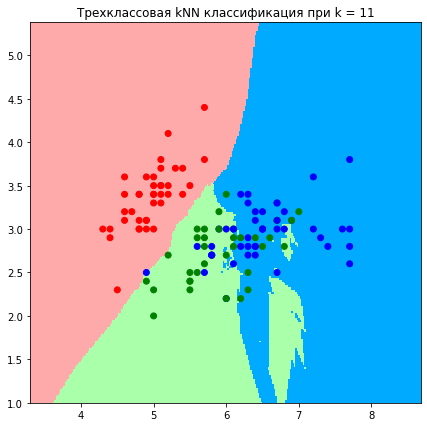

Точность алгоритма при k = 13: 0.867


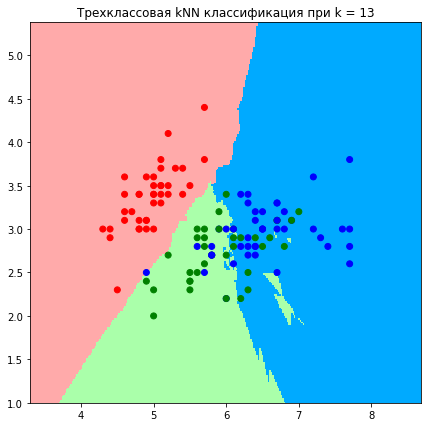

Точность алгоритма при k = 15: 0.867


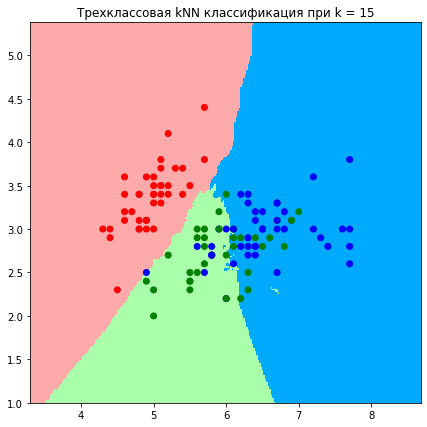

Точность алгоритма при k = 17: 0.867


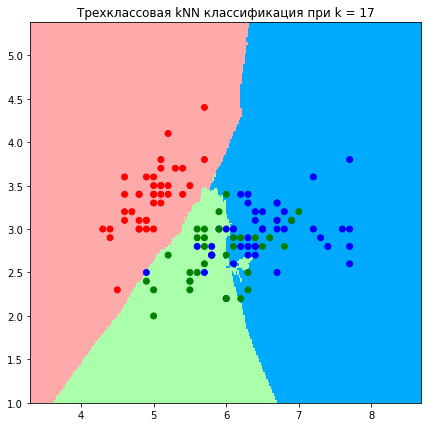

Точность алгоритма при k = 19: 0.833


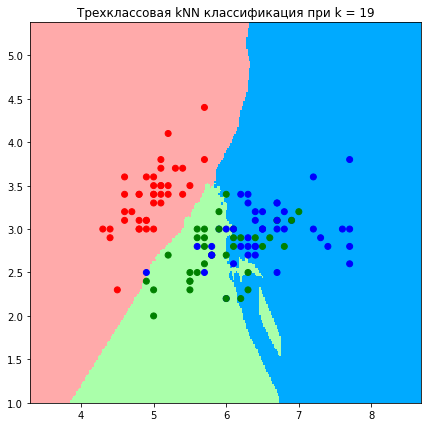

In [11]:
# position weights
accuracy_array_pos_weights = np.array([])
for k in range(1,21,2):
    y_pred = knn(X_train, y_train, X_test, k, '1/i')
    temp = accuracy(y_pred, y_test)
    accuracy_array_pos_weights = np.append(accuracy_array_pos_weights, temp)
    print(f'Точность алгоритма при k = {k}: {temp:.3f}')
    get_graph(X_train, y_train, k)

### 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Точность алгоритма при k = 1: 0.667


<ipython-input-7-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


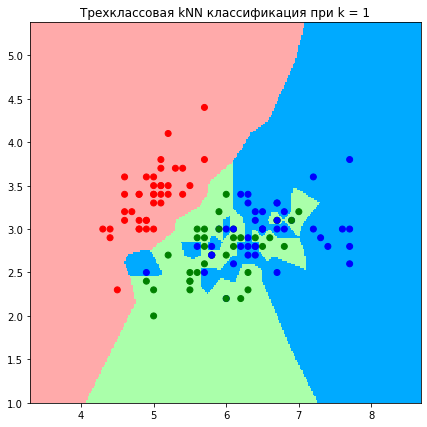

Точность алгоритма при k = 3: 0.733


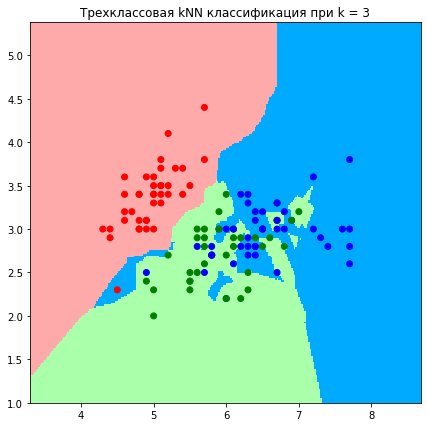

Точность алгоритма при k = 5: 0.867


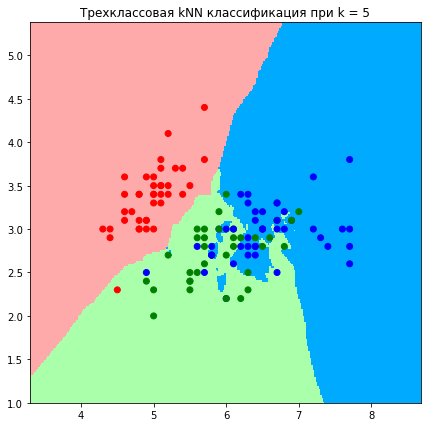

Точность алгоритма при k = 7: 0.800


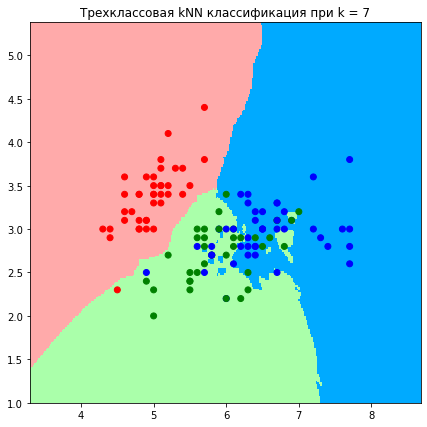

Точность алгоритма при k = 9: 0.867


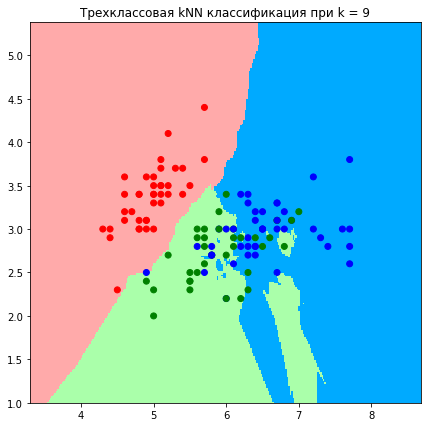

Точность алгоритма при k = 11: 0.833


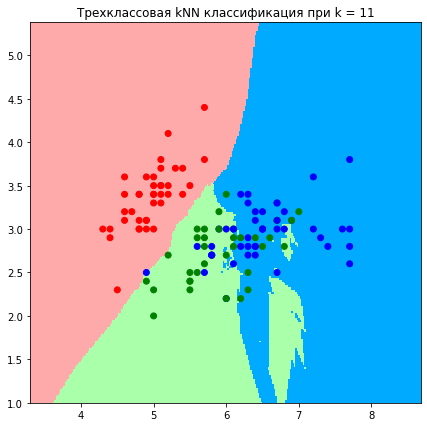

Точность алгоритма при k = 13: 0.833


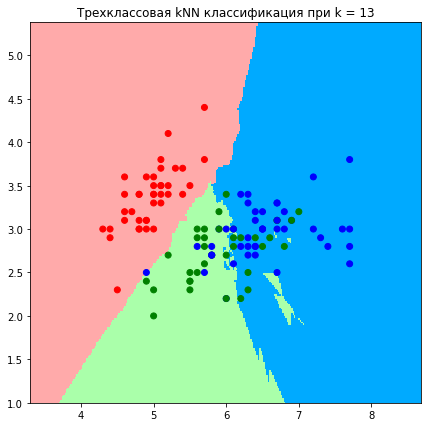

Точность алгоритма при k = 15: 0.833


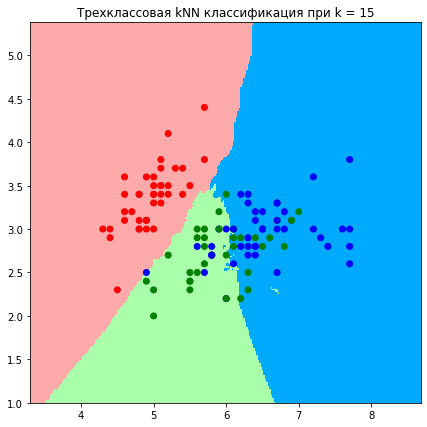

Точность алгоритма при k = 17: 0.833


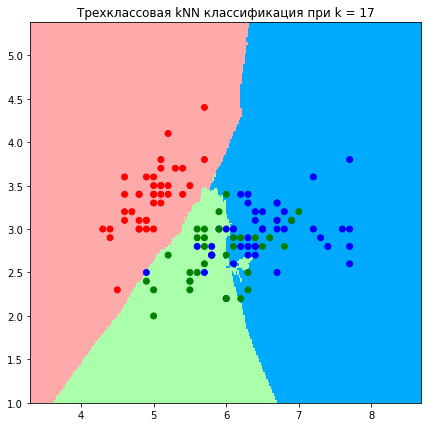

Точность алгоритма при k = 19: 0.833


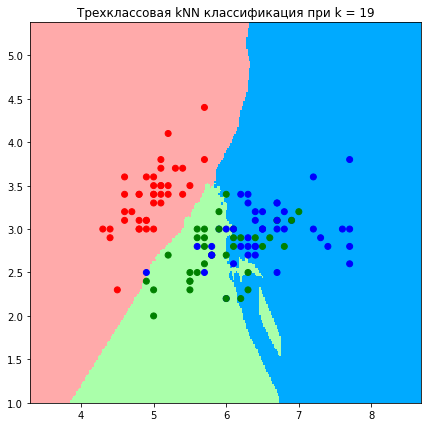

In [12]:
# distance weights
accuracy_array_dist_weights = np.array([])
for k in range(1,21,2):
    y_pred = knn(X_train, y_train, X_test, k, '1', 0.9)
    temp = accuracy(y_pred, y_test)
    accuracy_array_dist_weights = np.append(accuracy_array_dist_weights, temp)
    print(f'Точность алгоритма при k = {k}: {temp:.3f}')
    get_graph(X_train, y_train, k)

Точность алгоритма при k = 1: 0.667


<ipython-input-7-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


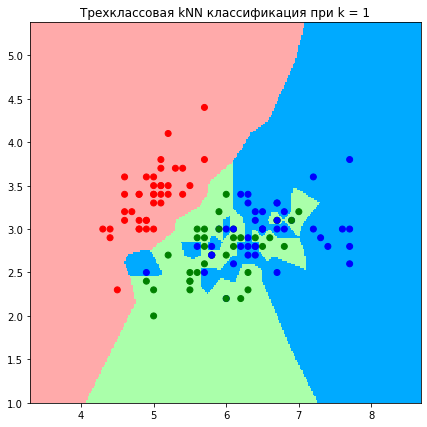

Точность алгоритма при k = 3: 0.733


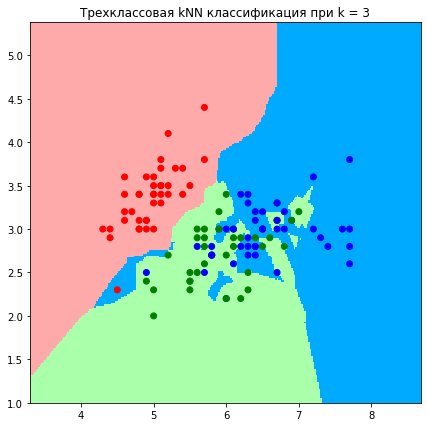

Точность алгоритма при k = 5: 0.867


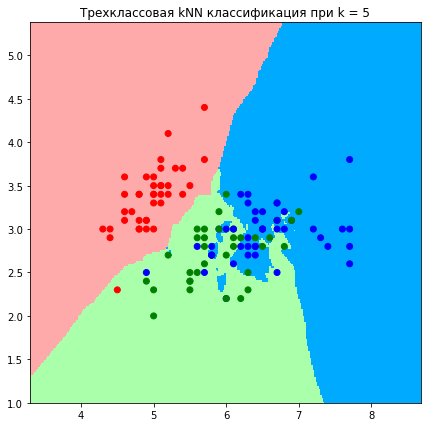

Точность алгоритма при k = 7: 0.800


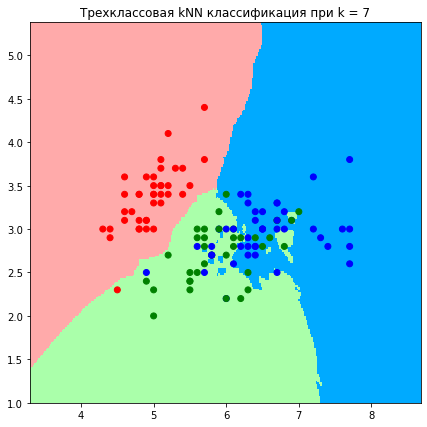

Точность алгоритма при k = 9: 0.867


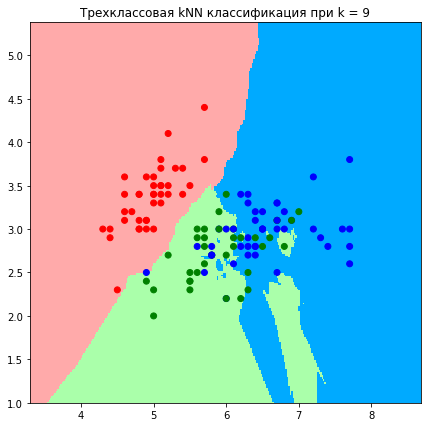

Точность алгоритма при k = 11: 0.833


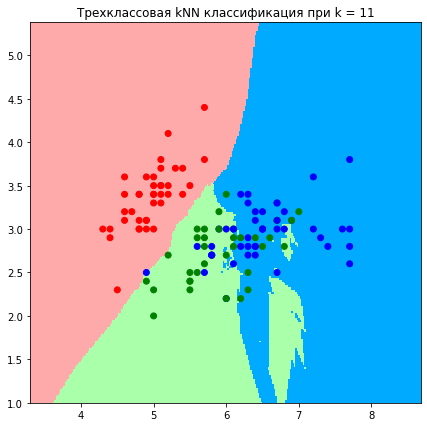

Точность алгоритма при k = 13: 0.833


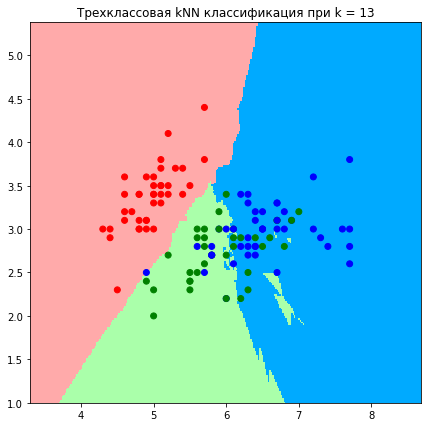

Точность алгоритма при k = 15: 0.833


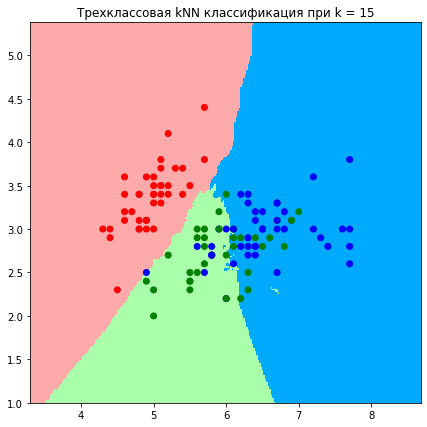

Точность алгоритма при k = 17: 0.833


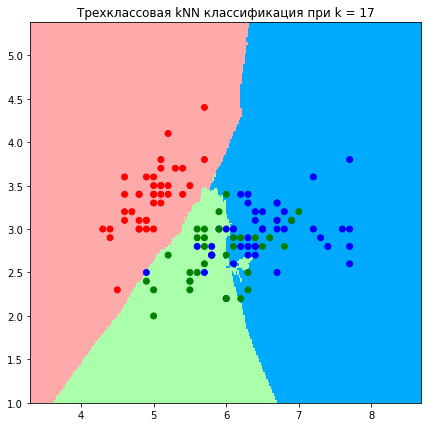

Точность алгоритма при k = 19: 0.833


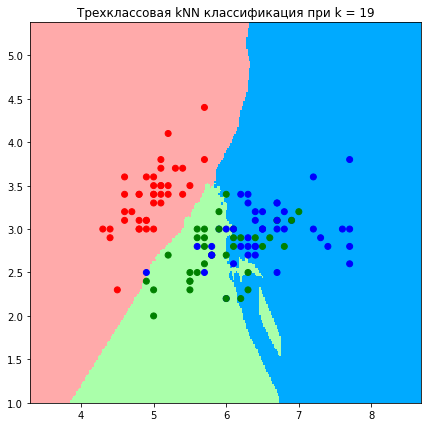

In [13]:
# distance weights 2-nd variant
accuracy_array_dist_weights2 = np.array([])
for k in range(1,21,2):
    y_pred = knn(X_train, y_train, X_test, k, '1', [6, -3] )
    temp = accuracy(y_pred, y_test)
    accuracy_array_dist_weights2 = np.append(accuracy_array_dist_weights2, temp)
    print(f'Точность алгоритма при k = {k}: {temp:.3f}')
    get_graph(X_train, y_train, k)

Сложность гиперплоскости растет и алгоритм выделяет более мелкие области для классификации при росте количества k ближайших соседей.
При прозвольном выборе параметров для расчета весов по расстоянию, алгоритм может показывать снижающуюся точность. 

### 3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 

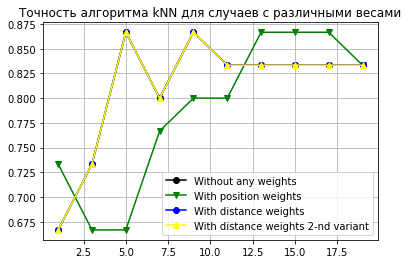

In [15]:
plt.plot(list(range(1,21,2)), accuracy_array, color = 'black', label='Without any weights', marker='o')
plt.plot(list(range(1,21,2)), accuracy_array_pos_weights, color = 'green', 
         label='With position weights', marker='v')
plt.plot(list(range(1,21,2)), accuracy_array_dist_weights, color = 'blue', 
         label='With distance weights', marker='8')
plt.plot(list(range(1,21,2)), accuracy_array_dist_weights2, color = 'yellow', 
         label='With distance weights 2-nd variant', marker='^')
plt.legend()
plt.title(f"Точность алгоритма kNN для случаев с различными весами")
plt.grid(True)
plt.show()

Оптимальное число соседей в алгоритмах:

In [26]:
print(f'Алгоритм kNN без дополнительных весовых коэффициентов требует k'
      f'= {list(accuracy_array).index(np.max(accuracy_array))*2 - 1} при точности {np.max(accuracy_array):.3f}\n'
      f'Алгоритм kNN c весми от положения элементов требует k'
      f'= {list(accuracy_array_pos_weights).index(np.max(accuracy_array_pos_weights))*2 - 1}'
      f' при точности {np.max(accuracy_array_pos_weights):.3f}\n'
      f'Алгоритм kNN c весми от значения расстояния требует k'
      f'= {list(accuracy_array_dist_weights).index(np.max(accuracy_array_dist_weights))*2 - 1} или'
      f' {list(accuracy_array_dist_weights2).index(np.max(accuracy_array_dist_weights2))*2 - 1}'
      f' при точности {np.max(accuracy_array_dist_weights):.3f} или '
      f' {np.max(accuracy_array_dist_weights):.3f} в зависимости от метода расчета веса')

Алгоритм kNN без дополнительных весовых коэффициентов требует k= 3 при точности 0.867
Алгоритм kNN c весми от положения элементов требует k= 11 при точности 0.867
Алгоритм kNN c весми от значения расстояния требует k= 3 или 3 при точности 0.867 или  0.867 в зависимости от метода расчета веса
